In [8]:
# Scientific libraries
import scipy
from scipy import stats
import numpy as np
import pandas as pd

# Graphic libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import japanize_matplotlib
# import seaborn as sns
# import holoviews as hv
# from bokeh.io import output_notebook
# output_notebook()
# from bokeh.io import show
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# from ipywidgets import interact # Interactive graph

# Statistical libraries
# import statsmodels.stats as stats
# import statsmodels.stats.multicomp as multi
# import statsmodels.formula.api as smf
# import scikit_posthocs as sp

# Other libraries
# import re
# from datetime import datetime
# import collections

# Creating alias for magic commands
%alias_magic t time

from icecream import ic

Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


In [2]:
def save_fig(name,
             exts=('pdf', 'png', 'svg', 'jpg'),
             bbox_inches='tight'):
    for ext in exts:
        plt.savefig('{}.{}'.format(name, ext),
                    format=ext,
                    bbox_inches=bbox_inches)

In [27]:
data = np.array([2, 2, 4, 6, 4, 5, 2, 3, 1, 2,
                 0, 4, 3, 3, 3, 3, 4, 2, 7, 2,
                 4, 3, 3, 3, 4, 3, 7, 5, 3, 1,
                 7, 6, 4, 6, 5, 2, 4, 7, 2, 2,
                 6, 2, 4, 5, 4, 5, 1, 3, 2, 3])
data = pd.DataFrame(data)
display(data.T)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2,2,4,6,4,5,2,3,1,2,...,6,2,4,5,4,5,1,3,2,3


In [47]:
display(data.describe())

print("mean: {:.3f}".format(data.mean()[0]))
print("variance: {:.3f}".format(data.var()[0]))
print("standard deviation: {:.3f}".format(data.std()[0]))
print("standard error: {:.3f}".format(data.sem()[0]))

,0
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


mean: 3.560
variance: 2.986
standard deviation: 1.728
standard error: 0.244


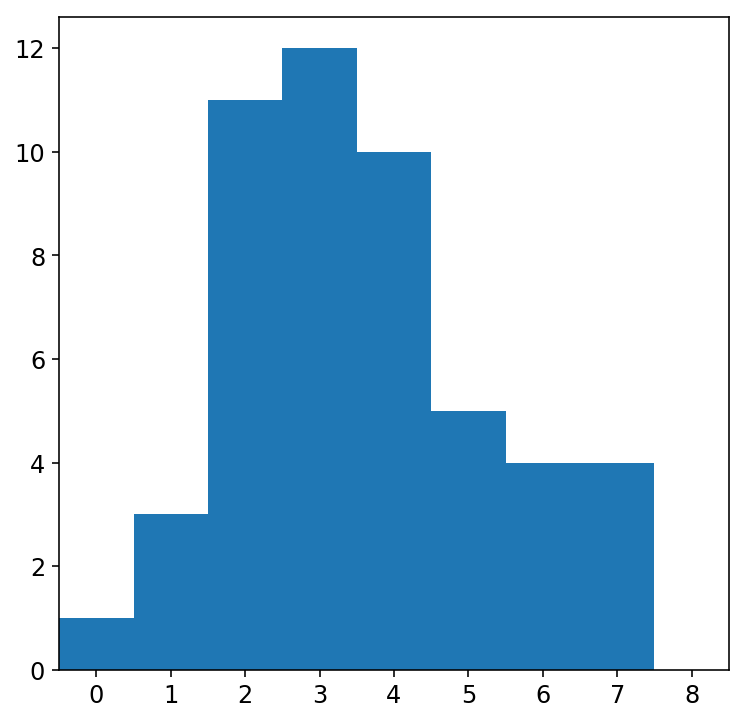

In [58]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

bins = np.arange(data.max()[0] + 3)
plt.hist(x=data[0], bins=bins)
bins_labels(bins)
plt.show()

ic| mu: 0    3.56
        dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.028439,0.101242,0.180211,0.213851,0.190327,0.135513,0.080404,0.040891,0.018197,0.007198,0.002562,0.000829,0.000246,0.000067,0.000017,0.000004,9.046738e-07


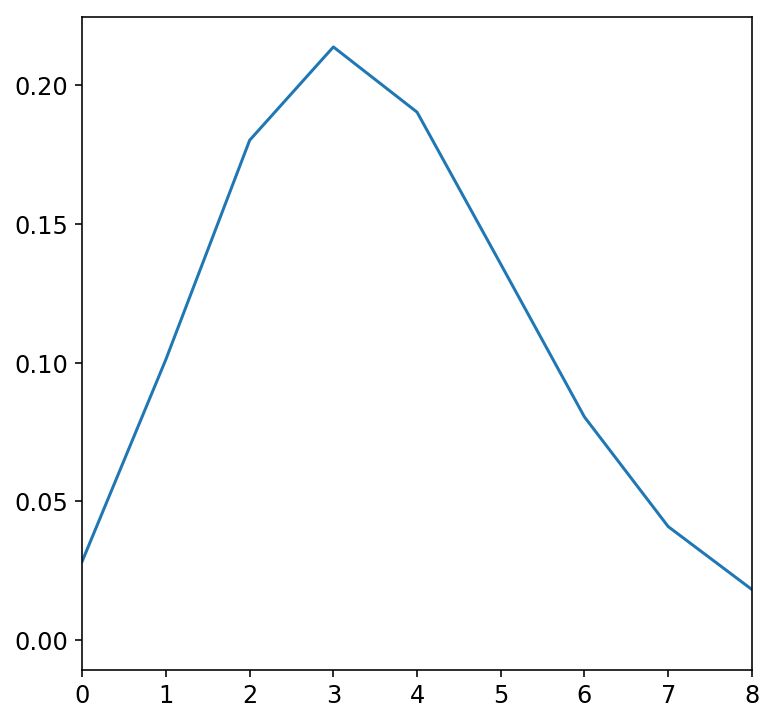

In [59]:
mu = data.mean()
ic(mu)

poisson_model = stats.poisson(mu=mu)
x = np.arange(0, data.max()[0] + 10)
prod = pd.DataFrame(stats.poisson.pmf(x, mu=mu),
                    index=x)
display(prod.T)

rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

plt.plot(np.array(prod.index),
         np.array(prod.values))
plt.xlim(0, data.max()[0]+1)
plt.show()

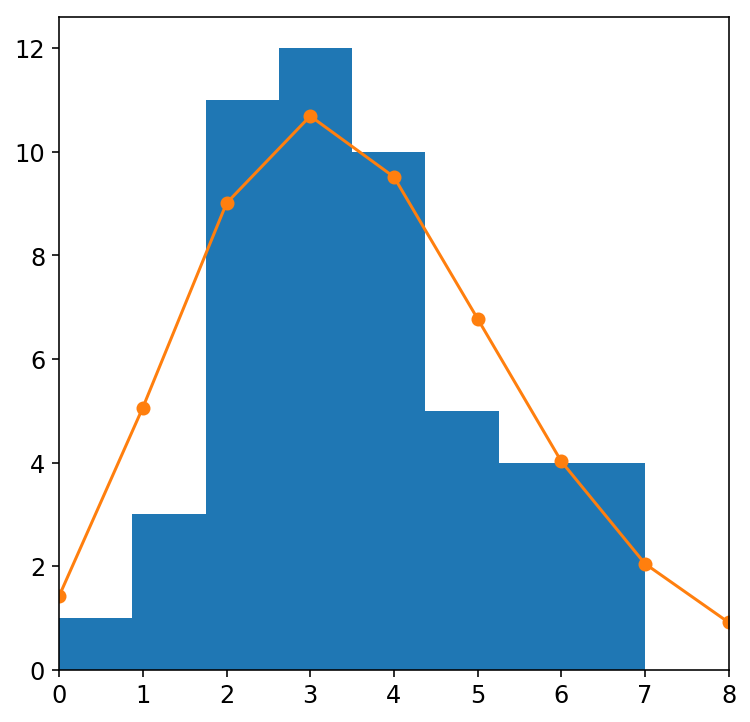

In [60]:
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

plt.hist(x=data[0], bins=8)
plt.plot(np.array(prod.index),
         np.array(prod.values)*50,
         'o-')

plt.xlim(0, data.max()[0]+1)

plt.show()

# Poisson distribution

$$
\begin{align}
  P(y|\lambda) &= \frac{\lambda^{y} e^{-\lambda}}{y!} \\
  \lambda &\stackrel{\text{def}}{=} \rm{Mean\ value}
\end{align}
$$

- 分散と平均が等しい

# Maximum likelihood estimation

ポアソン分布の尤度

$$
\begin{align}
  L(\lambda) &= P(y_1|\lambda) \times P(y_2|\lambda) \times \cdots \times P(y_n|\lambda) \\
  &= \prod_{i} P(y_i|\lambda) \\
  &= \prod_{i} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!} \\
  L(\lambda) &\stackrel{\text{def}}{=} \text{Likelihood}
\end{align}
$$

# Log likelihood function

$$
\begin{align}
  \log L(\lambda) &= \log \left( \prod_{i} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!} \right) \\
  &= \sum_{i} \left( y_i \log \lambda - \lambda - \sum_{k}^{y_i} \log k \right) \\
\end{align}
$$

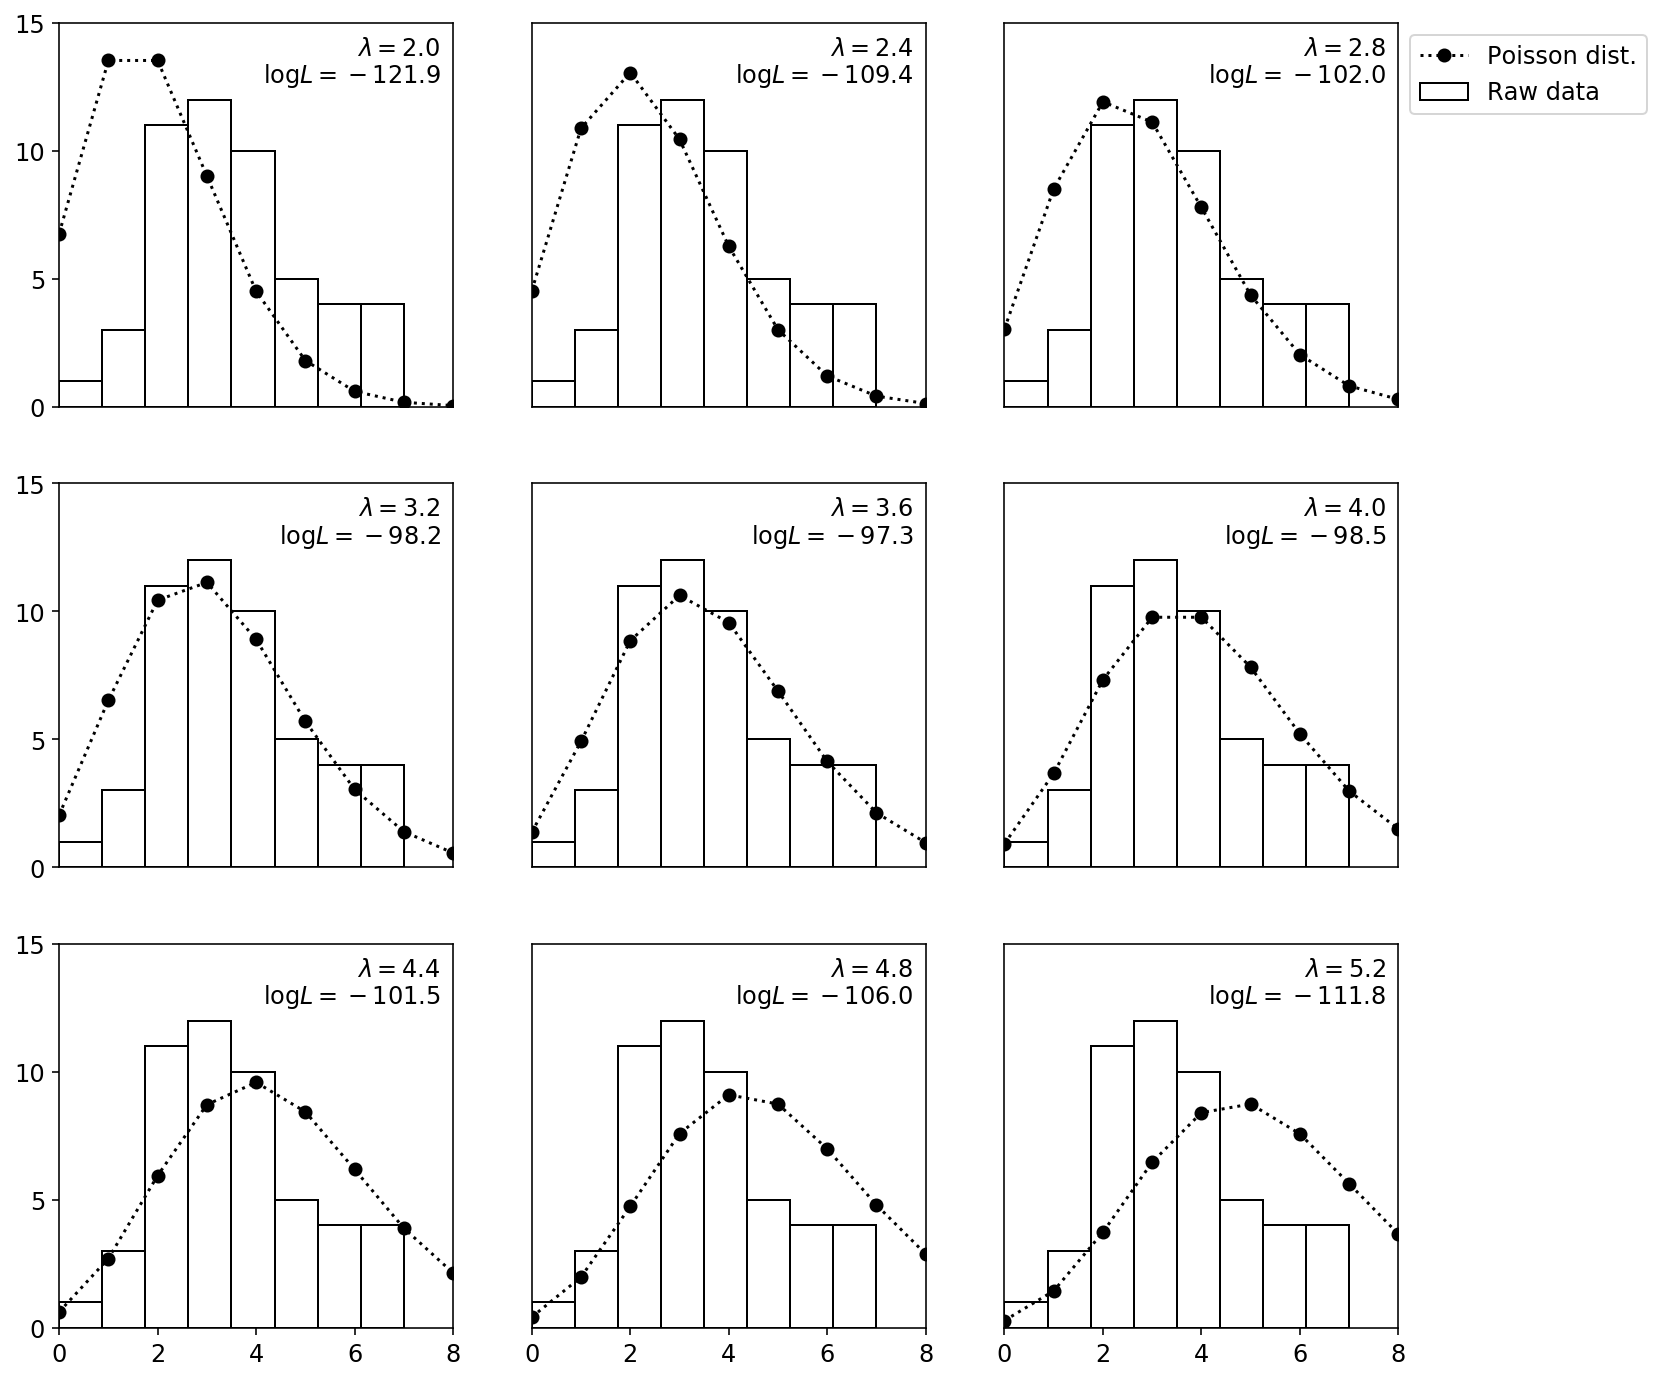

In [102]:
def log_likelihood(y, mu):
    return sum(stats.poisson.logpmf(data, mu))

# Set parameters
fontsize = 12
figsize = (12, 12)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
axes = {}

mu_init = 2.0

x = np.arange(0, data.max()[0] + 10)

for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)

    mu = mu_init + 0.4 * i
    
    ax.hist(x=data[0],
            bins=8,
            label="Raw data",
            color="white",
            edgecolor="black")
    prod = pd.DataFrame(stats.poisson.pmf(x, mu=mu),
                        index=x)
    ax.plot(np.array(prod.index),
            np.array(prod.values)*50,
            'o:',
            color="black",
            label="Poisson dist.")
    
    # X-axis Settings
    ax.set_xlim(0, data.max()[0]+1)
    if i < 6:
        ax.set_xticks([])
    # ax.set_xlim(0, 1)
    # ax.set_xlabel('X-axis')

    # Y-axis Settings
    ylim_max = 15
    ax.set_ylim(0, ylim_max)
    if i % 3 != 0:
        ax.set_yticks([])
    else:
        ax.set_yticks(np.linspace(0, ylim_max, 4))
        
    ax.text(s="$\lambda = {:.1f}$".format(mu),
            x=data.max()[0]+0.75,
            y=ylim_max-0.5,
            horizontalalignment="right",
            verticalalignment="top")
    ax.text(s="$\log L = {:.1f}$".format(log_likelihood(data,
                                                        mu)[0]),
            x=data.max()[0]+0.75,
            y=ylim_max-1.5,
            horizontalalignment="right",
            verticalalignment="top")

    # Legend Settings
    if i == 2:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# save_fig(filename)
plt.show()

Maximum likelihood : -97.244
Maximum likelihood estimate : 3.560
Mean of data: 3.560


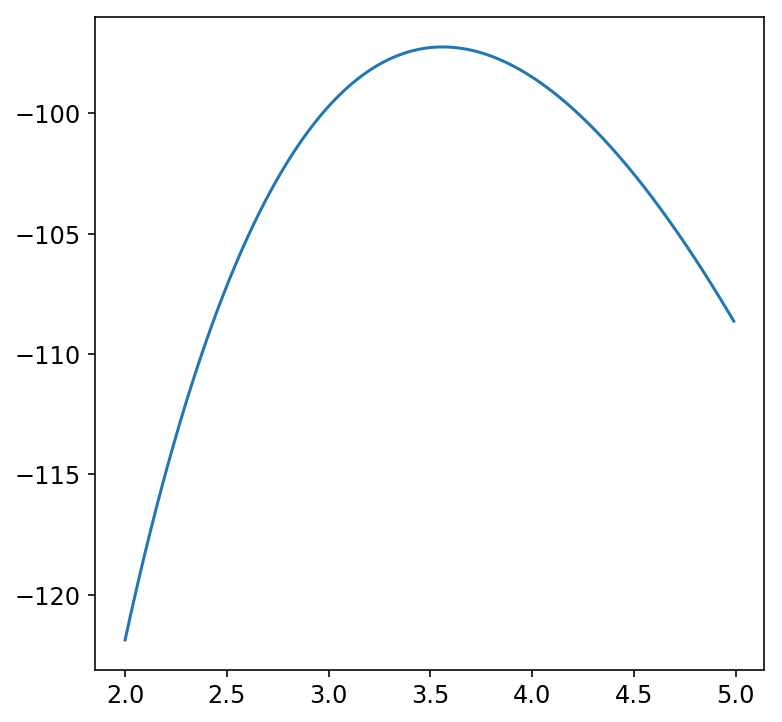

In [119]:
print("Maximum likelihood : {:.3f}".format(max(y)[0]))
print("Maximum likelihood estimate : {:.3f}".format(x[y.index(max(y))]))
print("Mean of data: {:.3f}".format(data.mean()[0]))

rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

x = np.arange(2, 5, 0.01)
y = [log_likelihood(data, lam) for lam in x]

plt.plot(x, y)

plt.show()

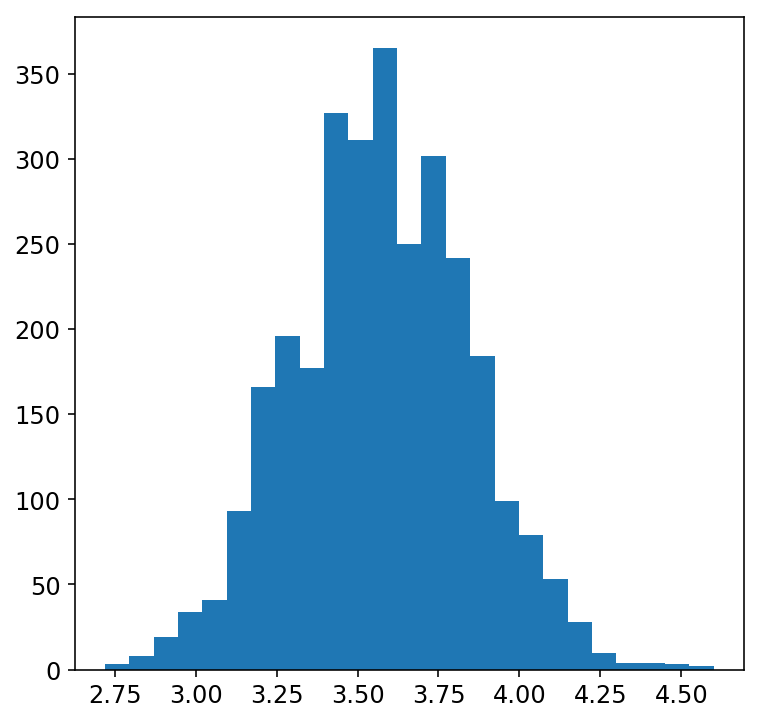

In [124]:
y = [np.random.poisson(lam=data.mean()[0],
                       size=len(data)).mean() for i in range(3000)]
plt.hist(y,
         bins=25)
plt.show()